# Zack Lee: Final Project CS456

In [144]:
# Import Statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [145]:
games_df = pd.read_csv('vgsales.csv')

Print the head of the data frame to see the datas attributes

In [146]:
games_df.head()

,Unnamed: 0,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,11,The Sims,Series,2000.0,Electronic Arts,Maxis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,12,Final Fantasy,Series,1987.0,Square,Square,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,13,Grand Theft Auto V,All,2013.0,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,14,Mario Kart,Series,1992.0,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,15,Need for Speed,Series,1994.0,Electronic Arts,EA Black Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
# list the different object types
games_df.dtypes

Unnamed: 0        int64
Rank              int64
Name             object
Platform         object
Year            float64
Publisher        object
Developer        object
Critic_Score    float64
User_Score      float64
NA_Sales        float64
PAL_Sales       float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# Section 1: Which regions sales correlate most strongly with each other, and which ones correlate to global sales the most?

I will show which regions sales are most correlated to each other and which regional sales contribute/correlate the most towards the global sales using a correlation matrix

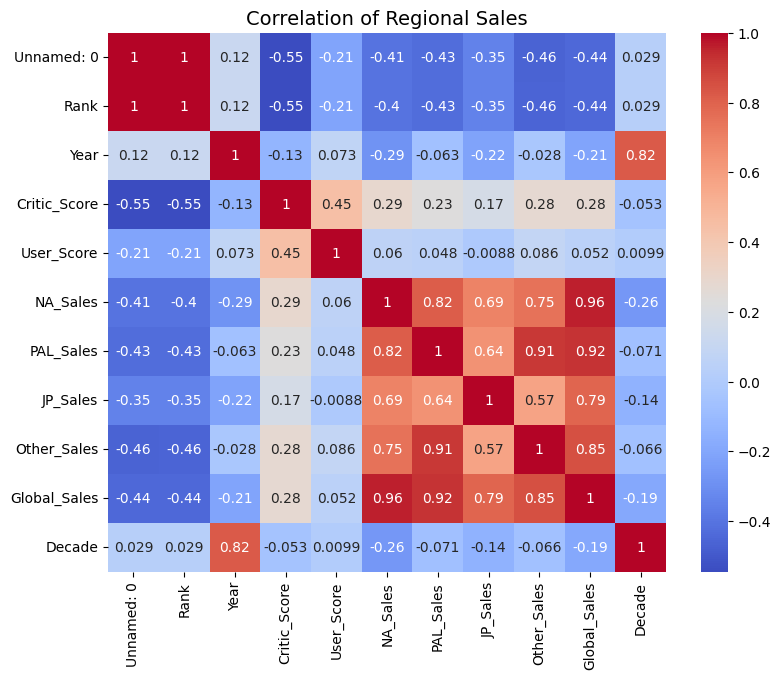

<Figure size 640x480 with 0 Axes>

In [177]:
reg_sales = games_df.iloc[:, :].corr(numeric_only = True)
plt.figure(figsize=(9,7))
sns.heatmap(reg_sales, annot=True, cmap='coolwarm')
plt.title("Correlation of Regional Sales", fontsize=14)
plt.show()
plt.savefig("Correlation_Matrix_Zack.png")

In the above correlation matrix, looking just as the sales portion of the matrix in the bottom right. Starting with the NA region, we can see that PAL sales correlate mostly with the NA region. As for the rest of the regions which inlcude PAL, JP, and other regions. That NA sales correlated the most towards all other regional sales. Or did it? 

Lets check this by sorting the values and based on which attribute we are looking at and printing the top 3 values of each correlation.

Starting with the NA region sales

In [149]:
NA = reg_sales['NA_Sales'].drop(["NA_Sales", "Global_Sales"])
print(NA.sort_values(ascending = False).head())

PAL_Sales       0.752031
Other_Sales     0.648550
JP_Sales        0.504691
Critic_Score    0.263950
User_Score      0.130975
Name: NA_Sales, dtype: float64


As we can see in the above code, by sorting the values and dropping the NA_Sales and Global_Sales, we can see that in terms of correlation it goes PAL sales, Other Sales, and then Japan sales. 

Next we will look at the PAL sales

In [150]:
PAL = reg_sales['PAL_Sales'].drop(["PAL_Sales", "Global_Sales"])
print(PAL.sort_values(ascending = False).head())

NA_Sales        0.752031
Other_Sales     0.742473
JP_Sales        0.462581
Critic_Score    0.227500
User_Score      0.114720
Name: PAL_Sales, dtype: float64


Just like we previously saw, NA sales is the most correlated to the PAL sales followed by other sales and then Japan sales

Laslty, lets look at Japan and Other sales in terms of correlation to other regions

In [151]:
JP = reg_sales['JP_Sales'].drop(["JP_Sales", "Global_Sales"])
Other = reg_sales['Other_Sales'].drop(["Other_Sales", "Global_Sales"])

In [152]:
print(JP.sort_values(ascending = False).head())

NA_Sales        0.504691
PAL_Sales       0.462581
Other_Sales     0.271071
Critic_Score    0.209008
User_Score      0.034414
Name: JP_Sales, dtype: float64


In [153]:
print(Other.sort_values(ascending = False).head())

PAL_Sales       0.742473
NA_Sales        0.648550
JP_Sales        0.271071
Critic_Score    0.202575
User_Score      0.175456
Name: Other_Sales, dtype: float64


Unlike my previous statement, we can see that in terms of Japan Sales, NA still has the biggest correlation followed by PAL sales, and then Other sales. But in terms of Other sales, the PAL regional sales actually correlates the most to the Other sales unlike the rest of the regions that are mostly dependent on the NA sales in terms of correlation on sales per region.

Finally, lets look at which regional sales correlate the most to the overall global sales

In [154]:
global_sales = reg_sales['Global_Sales'].drop("Global_Sales")
print(global_sales.sort_values(ascending = False).head())

NA_Sales        0.941104
PAL_Sales       0.903015
Other_Sales     0.765800
JP_Sales        0.625861
Critic_Score    0.252686
Name: Global_Sales, dtype: float64


As we couldve assumed based on the previous findings, the NA regional sales correlates the most with global sales meaning that when the global sales are rising, it is will mostly be because of the NA region selling a substantial amount of a video games to the consumer. Based on this data we can see what region companies should focus on for advertising and consumerism in order to sell the most amount of games possible to maximize profits.

# Section 1 Conclusion

By using a correlation matrix and filtering the data, we were able to extract valuable information on regional sales and see what regions sales correlated to each other the most and which regions sales correlated to the overal global sales the most

# Section 2: Can we classify video games into low, medium, and high selling games based on their regional sales using KNN?

In this section I will be attempting to use KNN to classify the video games into different categories or sections based on their regional sales

In [155]:
# First we will select our different categories/classes and unskew the dataset
games_df = games_df.dropna()
games_df['Sales_Class'] = pd.cut(games_df['Global_Sales'], bins = [0, 0.5, 2, 100], labels = ['Low Sales', 'Medium Sales', 'High Sales'])

In [156]:
# Select our X and y values
X = games_df[['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Year']]
y = games_df['Sales_Class']

In [157]:
# normalize our data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [158]:
# Train our data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)

In [159]:
# Make the KNN model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [160]:
# display a small confusion matrix to show the split between the different classes of sales
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[21,  0,  2],
       [ 0,  5,  1],
       [ 1,  2, 21]])

By showing the confusion matrix, we can see that 24 games were classified correclty as low selling games, and one was incorreclt classified as high selling. In the medium sales, 3 were correctly calssified with 2 being incorreclty classified in the high selling games. Lastly with the high selling games, 16 games were correctly classified while 7 were not with that split being 4, 3 into low and medium games. This demonstrates that our classification can predict low-selling games very accurately with 24/25 being correct, but with the medium selling games, only 3/5 were correctly classified. This is not a very good result but very helpful non the less, the calssification was worse because of some overlap between the high and medium selling games. Laslty we can see high selling games was 16/23 correct which is 69% accurate.

In [161]:
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    cv_scores.append(scores.mean())


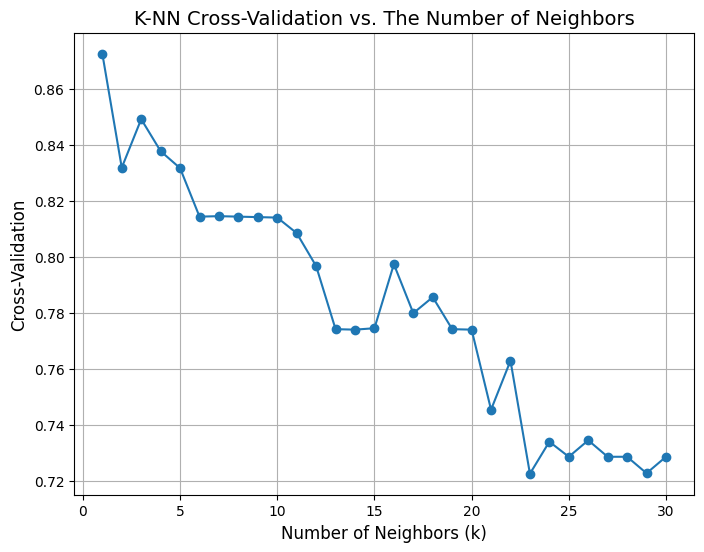

<Figure size 640x480 with 0 Axes>

In [178]:
# Plot the Figure
plt.figure(figsize=(8,6))
plt.plot(k_values, cv_scores, marker='o')
plt.title("K-NN Cross-Validation vs. The Number of Neighbors", fontsize=14)
plt.xlabel("Number of Neighbors (k)", fontsize=12)
plt.ylabel("Cross-Validation", fontsize=12)
plt.grid(True)
plt.show()
plt.savefig("Cross_Validation_Zack.png")

In [163]:
# get the best k value
best_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

best_k, best_score

(1, np.float64(0.8724369747899159))

In the above plot we can see the KNN cross-validation versus the number of neighbors, or in simpler terms we can see how well our model can predict and classify the games regional sales or accuracy based on different values of k. We can see that the best k value is actually 1 with an accuracy of around 87% for the different classifiaction which is not perfect but still very good. 

# Section 2 Conclusion

In conclusion, we can use KNN to classifiy the the video games into different sales categories (Low, Medium, and High). Using the confusion matrix we weere able to check our classifications and see which one were successful and which ones were more inaccurate. After that we used cross-validation to check for different k values for which one was optimal in classifiying the different classes. We found that when k = 1 with a fold of 5, produced the best result with an accuracy of around 87.3% for calssifying the differenr regional sales classes.

# Section 3: How have the global sales changed over the decades?

In this section I will be breaking down the games into different years of release date in order to see the change in sales accross different decades. I will be using a line graph to show the yearly global sales, bar chart to compare the different global sales, outliers, and regional sale trends.

In [164]:
# group into different decades
games_df['Decade'] = (games_df['Year'] // 10) * 10
games_df

,Unnamed: 0,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Class,Decade
62,63,74,Super Mario Bros.,NES,1985.0,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24,High Sales,1980.0
69,70,81,Mario Kart Wii,Wii,2008.0,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98,High Sales,2000.0
81,82,93,Wii Sports Resort,Wii,2009.0,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90,High Sales,2000.0
91,92,103,New Super Mario Bros.,DS,2006.0,Nintendo,Nintendo EAD,9.1,8.1,11.28,9.19,6.50,2.89,29.85,High Sales,2000.0
92,93,104,New Super Mario Bros. Wii,Wii,2009.0,Nintendo,Nintendo EAD,8.6,9.2,14.53,7.01,4.70,2.27,28.51,High Sales,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13045,13500,13641,BlazBlue: Calamity Trigger Portable,PSP,2010.0,Aksys Games,Arc System Works,7.9,8.4,0.07,0.01,0.03,0.01,0.11,Low Sales,2010.0
13160,13617,13758,Ys VIII: Lacrimosa of Dana,NS,2018.0,NIS America,Nihon Falcom Corporation,8.5,6.7,0.03,0.03,0.03,0.01,0.11,Low Sales,2010.0
14212,14680,14831,Battle Fantasia,X360,2008.0,Aksys Games,Arc System Works,7.0,8.0,0.07,0.00,0.01,0.01,0.09,Low Sales,2000.0
16591,17072,17253,Muramasa: The Demon Blade,Wii,2009.0,Ignition Entertainment,Vanillaware,8.0,9.3,0.32,0.13,0.11,0.04,0.60,Medium Sales,2000.0


In [165]:
# get the total global sales per decade (In millions)
games_df.groupby('Decade')['Global_Sales'].sum()

Decade
1980.0     40.24
1990.0     35.28
2000.0    506.51
2010.0    158.15
Name: Global_Sales, dtype: float64

In [166]:
# get the average amount of games sold per decade
games_df.groupby('Decade')['Global_Sales'].mean()

Decade
1980.0    40.240000
1990.0     5.040000
2000.0     4.220917
2010.0     3.438043
Name: Global_Sales, dtype: float64

In [167]:
# Show the one outlier
games_df[games_df['Decade'] == 1980]

,Unnamed: 0,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Class,Decade
62,63,74,Super Mario Bros.,NES,1985.0,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24,High Sales,1980.0


In [168]:
# get the number of games released per decade
games_df.groupby('Decade').size()

Decade
1980.0      1
1990.0      7
2000.0    120
2010.0     46
dtype: int64

In the above sections of code we can see the total number of global sales by decade, the average amount of games sold per decade, and laslty the total number of different games released per decade.

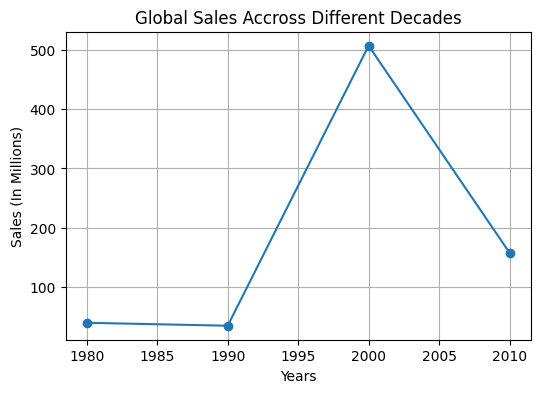

<Figure size 640x480 with 0 Axes>

In [179]:
# plot the sales (in millions) accross the decades
d_sales = games_df.groupby('Decade')['Global_Sales'].sum()
plt.figure(figsize=(6,4))
plt.plot(d_sales.index, d_sales.values, marker='o')
plt.title("Global Sales Accross Different Decades")
plt.xlabel("Years")
plt.ylabel("Sales (In Millions)")
plt.grid(True)
plt.show()
plt.savefig("Sales_Line_Zack.png")

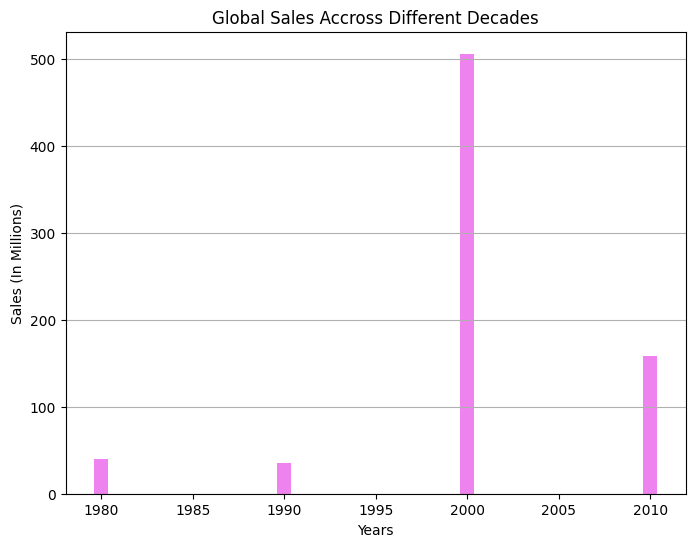

<Figure size 640x480 with 0 Axes>

In [180]:
# do the same using a bar plot 
plt.figure(figsize=(8,6))
plt.bar(d_sales.index, d_sales.values, color = 'violet')
plt.title("Global Sales Accross Different Decades")
plt.xlabel("Years")
plt.ylabel("Sales (In Millions)")
plt.grid(axis = 'y')
plt.show()
plt.savefig("Sales_Bar_Zack.png")

Looking at the above line and bar plots, we can see the temporal trends or differences in global sales based on the different decades. In the 1980s we can see that global sales were only 40.24 million, the 1990's sold even less than the 80's with only 35.28 million but in the 2000's the global sales reach an all time high of 506.51 million. Following this massive boom we could expect another on or one of similar size but in the 2010s there was a significant decrease in global sales where it only reached 158.15 million in sales. Lets take a deeper look into the data and find the biggest contributors and publishers during this time.

In [171]:
# Grab the different publishers in the dataset
publishers = games_df['Publisher'].unique()
publishers

array(['Nintendo  ', 'Sony Interactive Entertainment  ',
       'Microsoft Game Studios  ', 'Activision  ', 'Rockstar Games  ',
       'Sony Computer Entertainment  ', 'Square  ', 'Konami  ',
       'Square Enix  ', 'Ubisoft  ', 'Capcom  ', 'Bethesda Softworks  ',
       'Enix  ', 'Electronic Arts  ', 'Valve Corporation  ', '2K Games  ',
       'RedOctane  ', 'LucasArts  ', 'Square EA  ', 'Sega  ',
       'EA Sports  ', 'Atari  ', 'Atlus  ', 'Namco Bandai  ', 'THQ  ',
       'Working Designs  ', 'Namco  ', 'Bandai Namco Entertainment  ',
       'Ignition Entertainment  ', 'Natsume  ', 'Xseed Games  ',
       'Aksys Games  ', 'NIS America  '], dtype=object)

In [172]:
# get the number of games each publisher has released
publisher_counts = games_df['Publisher'].value_counts()
publisher_counts

Publisher
Nintendo                            36
Sony Computer Entertainment         24
Capcom                              16
Sega                                11
Square Enix                         10
Microsoft Game Studios              10
Ubisoft                              9
Konami                               7
Activision                           6
Electronic Arts                      6
Rockstar Games                       5
2K Games                             3
Bethesda Softworks                   3
Namco Bandai                         3
Atlus                                2
THQ                                  2
Sony Interactive Entertainment       2
Xseed Games                          2
Aksys Games                          2
Ignition Entertainment               2
Square                               1
RedOctane                            1
Valve Corporation                    1
Enix                                 1
EA Sports                            1
Atari          

In [173]:
# Get the number of sales per publisher
publisher_sales = games_df.groupby('Publisher')['Global_Sales'].sum()
publisher_sales.sort_values(ascending = False)

Publisher
Nintendo                            371.99
Sony Computer Entertainment          79.25
Microsoft Game Studios               43.75
Capcom                               41.06
Activision                           37.88
Rockstar Games                       28.21
Square Enix                          26.83
Ubisoft                              15.65
Konami                               14.92
Electronic Arts                      12.96
Sega                                 12.33
Sony Interactive Entertainment       11.97
Square                                8.05
Bethesda Softworks                    6.54
2K Games                              4.72
Enix                                  4.47
Valve Corporation                     3.52
RedOctane                             2.25
Atlus                                 2.09
Square EA                             1.86
LucasArts                             1.86
Namco Bandai                          1.46
THQ                                   1.24
E

In [174]:
# Get each publishers global sales for each decade
pub_dec_sales = games_df.groupby(['Publisher', 'Decade'])['Global_Sales'].sum()
pub_dec_sales

Publisher                         Decade
2K Games                          2000.0      4.72
Activision                        2000.0     37.88
Aksys Games                       2000.0      0.09
                                  2010.0      0.11
Atari                             2000.0      1.03
Atlus                             2000.0      1.83
                                  2010.0      0.26
Bandai Namco Entertainment        2010.0      0.33
Bethesda Softworks                2000.0      4.96
                                  2010.0      1.58
Capcom                            2000.0     34.16
                                  2010.0      6.90
EA Sports                         2010.0      1.10
Electronic Arts                   2000.0      2.34
                                  2010.0     10.62
Enix                              2000.0      4.47
Ignition Entertainment            2000.0      0.60
                                  2010.0      0.26
Konami                            1990.0 

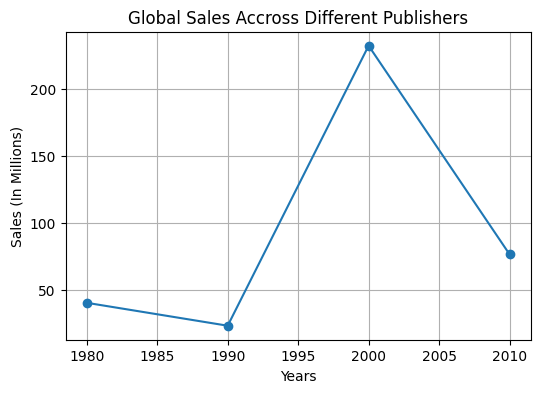

<Figure size 640x480 with 0 Axes>

In [181]:
# plot the results for nintendo
publisher_name = "Nintendo  "
nintendo_sales = pub_dec_sales.loc[publisher_name]
plt.figure(figsize=(6,4))
plt.plot(nintendo_sales.index, nintendo_sales.values, marker='o')
plt.title("Global Sales Accross Different Publishers")
plt.xlabel("Years")
plt.ylabel("Sales (In Millions)")
plt.grid(True)
plt.show()
plt.savefig("Nintendo_Line_Zack.png")

Comparing the ealrier line plot to the nintendo line plot, we can accuratly see/assume that nintendo is the leading driver in global sales accross the different decades amongst all the publishers. Lets also look at what games came out in the 2000's.

In [176]:
# display all the games in the 2000s and their global sales
games_df[games_df['Decade'] == 2000.0][['Name','Global_Sales']]

,Name,Global_Sales
69,Mario Kart Wii,35.98
81,Wii Sports Resort,32.90
91,New Super Mario Bros.,29.85
92,New Super Mario Bros. Wii,28.51
107,Wii Play,28.92
...,...,...
10916,Castlevania Judgment,0.16
12139,Little King's Story,0.29
14212,Battle Fantasia,0.09
16591,Muramasa: The Demon Blade,0.60


# Section 3 Conclusion

In conclusion, there were only 4 decades in the dataset (1980, 1990, 2000, 2010), and after separating the values into different decades and getting the total global sales per decade, we can see the trends across the decades with lower sales in the 1980'ss and 1990s than a massive increase in the 2000's with a sharp decline into the 2010's. We can also see the games that came out in the 2000's that contributed to the massive increase with those games being "Mario Kart Wii", "Wii Sports Resort" (My favorite), "Super Mario Bros" which had massivle global sales and easily contributed the most towards the 2000's having the most global sales across the decades.

# Esther Law

load video game sales csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score


In [3]:
df = pd.read_csv('vgsales.csv')
df

,Unnamed: 0,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,11,The Sims,Series,2000.0,Electronic Arts,Maxis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,12,Final Fantasy,Series,1987.0,Square,Square,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,13,Grand Theft Auto V,All,2013.0,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,14,Mario Kart,Series,1992.0,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,15,Need for Speed,Series,1994.0,Electronic Arts,EA Black Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56060,61843,62474,Zombieland: Double Tap - Road Trip,PC,2019.0,GameMill Entertainment,High Voltage Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56061,61844,62475,Zombillie,NS,2018.0,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56062,61845,62476,Zone of the Enders: The 2nd Runner MARS,PC,2018.0,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56063,61846,62477,Zoo Tycoon: Ultimate Animal Collection,XOne,2017.0,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Are certain publishers strongly associated with specific developers?

In [4]:
#filter the df into publisher and developer
cols = ['Publisher', 'Developer']
pub_dev = df[cols].values.tolist()
pub_dev

[['Electronic Arts  ', 'Maxis  '],
 ['Square  ', 'Square  '],
 ['Rockstar Games  ', 'Rockstar North  '],
 ['Nintendo  ', 'Nintendo  '],
 ['Electronic Arts  ', 'EA Black Box  '],
 ['Eidos Interactive  ', 'Core Design  '],
 ['Capcom  ', 'Capcom  '],
 ['Electronic Arts  ', 'Park Place Productions  '],
 ['2K Games  ', 'Visual Concepts  '],
 ['Nintendo  ', 'Nintendo  '],
 ['Nintendo  ', 'Nintendo  '],
 ['Konami  ', 'Konami  '],
 ['Sega  ', 'Sonic Team  '],
 ['Sony Interactive Entertainment  ', 'Polyphony Digital  '],
 ['Capcom  ', 'Capcom  '],
 ['Square  ', 'ArtePiazza  '],
 ['Nintendo  ', 'Nintendo EAD  '],
 ['Microsoft Game Studios  ', 'Bungie  '],
 ['Electronic Arts  ', 'EA DICE  '],
 ['2K Games  ', 'Gearbox Software  '],
 ['Nintendo  ', 'Nintendo  '],
 ['PUBG Corporation  ', 'PUBG Corporation  '],
 ['Team17  ', 'Team17  '],
 ['Warner Bros. Interactive Entertainment  ', 'Avalanche Software  '],
 ['Nintendo  ', 'Nintendo  '],
 ['Ubisoft  ', 'Ubisoft  '],
 ['PUBG Corporation  ', 'PUBG Corp

convert to one-hot format

In [5]:
te = TransactionEncoder()
te_array = te.fit(pub_dev).transform(pub_dev)
df_encoded = pd.DataFrame(te_array, columns = te.columns_)

In [6]:
df_encoded.head()

,5 Lives Studios,"AREA 34, Inc.",Hi-Bit Studios,Indietopia Games,Monstars Inc.,Petite Games\t,PlayStation PC,Private Division,Sunborn Games Technology Co,TeamKill Media,...,xPox,xXTomK2007xx,xisai,yaystuff,yeo,yuwaka,yyr,zSlide,zerozerozero,zio3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Run Apriori Algorithm

In [7]:
frequent_itemsets = apriori(df_encoded, min_support = 0.003, use_colnames = True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])

Total Frequent Itemsets: 73


In [8]:
frequent_itemsets

,support,itemsets
0,0.004584,(2K Games )
1,0.004406,(2K Sports )
2,0.004495,(505 Games )
3,0.009168,(Acclaim Entertainment )
4,0.028092,(Activision )
...,...,...
68,0.003639,"(EA Tiburon , EA Sports )"
69,0.003282,"(SNK Corporation , Hamster Corporation )"
70,0.004637,"(Koei , KOEI )"
71,0.003068,"(Taito , Taito Corporation )"


Generate Association Rules

In [9]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.005)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

Association Rules: 12


,antecedents,consequents,support,confidence,lift
0,(EA Sports ),(EA Canada ),0.005173,0.351942,50.986083
1,(EA Canada ),(EA Sports ),0.005173,0.749354,50.986083
2,(EA Tiburon ),(EA Sports ),0.003639,0.816000,55.520680
3,(EA Sports ),(EA Tiburon ),0.003639,0.247573,55.520680
4,(SNK Corporation ),(Hamster Corporation ),0.003282,0.467005,89.666574
5,(Hamster Corporation ),(SNK Corporation ),0.003282,0.630137,89.666574
6,(Koei ),(KOEI ),0.004637,0.915493,119.923160
7,(KOEI ),(Koei ),0.004637,0.607477,119.923160
8,(Taito ),(Taito Corporation ),0.003068,0.682540,142.254971
9,(Taito Corporation ),(Taito ),0.003068,0.639405,142.254971


In [10]:
#convert confidence to percentage value for graphing
rules['confidence_percent'] = rules['confidence'] * 100

Graph to show support and confidence

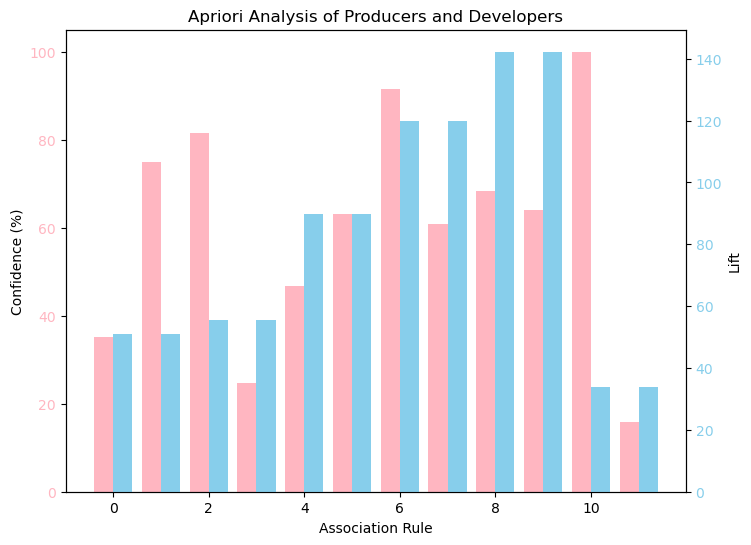

In [11]:
#spacing
x = np.arange(len(rules))
w = 0.4

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

plt.title('Apriori Analysis of Producers and Developers')

ax1.bar(x - w/2, rules['confidence_percent'], width = w, color = 'lightpink')
ax2.bar(x + w/2, rules['lift'], width = w, color = 'skyblue')

ax1.set_xlabel('Association Rule')
ax1.set_ylabel('Confidence (%)')
ax1.tick_params(axis= 'y', labelcolor = 'lightpink')

ax2.set_ylabel('Lift')
ax2.tick_params(axis= 'y', labelcolor = 'skyblue')
plt.savefig('association_bar.png')

Which attributes have the highest correlation with critic scores?

In [12]:
#get only numeric values
num_df = df.select_dtypes(include=np.number)
#drop unnamed column
num_df = num_df.drop('Unnamed: 0', axis = 1)
num_df

,Rank,Year,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,11,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,1994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
56060,62474,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56061,62475,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56062,62476,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56063,62477,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


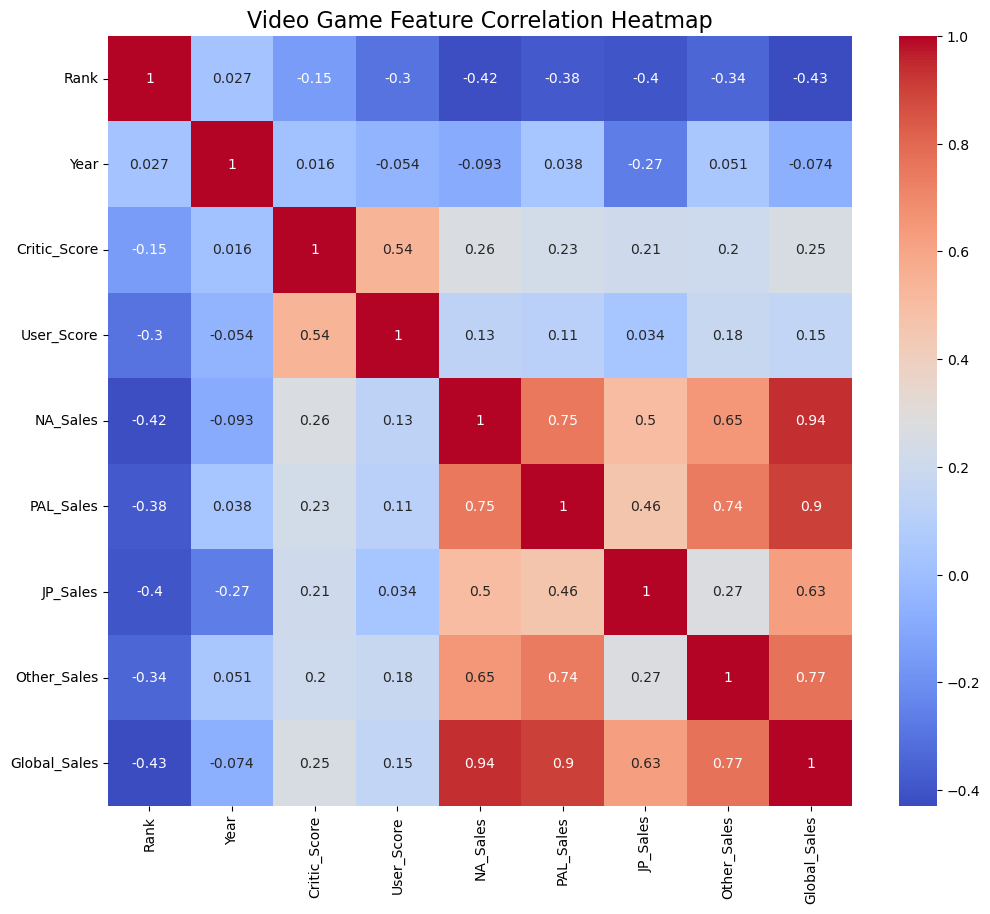

In [13]:
#plot a heatmap to visualize
plt.figure(figsize=(12,10))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Video Game Feature Correlation Heatmap", fontsize=16)
plt.savefig('corr_heatmap.png', bbox_inches='tight')
plt.show()

find features most correlated with critic scores

In [23]:
criticCorr = num_df.corr()['Critic_Score'].sort_values(ascending=False)

print('correlation or critic scores to each other attribute:\n')
print(criticCorr)

#get top 3
corr_top5 = criticCorr.drop('Critic_Score').head()
print('\nTop 5 correlations with Critic Scores:\n')
print(corr_top5)

correlation or critic scores to each other attribute:

Critic_Score    1.000000
User_Score      0.537753
NA_Sales        0.263950
Global_Sales    0.252686
PAL_Sales       0.227500
JP_Sales        0.209008
Other_Sales     0.202575
Year            0.015626
Rank           -0.151959
Name: Critic_Score, dtype: float64

Top 5 correlations with Critic Scores:

User_Score      0.537753
NA_Sales        0.263950
Global_Sales    0.252686
PAL_Sales       0.227500
JP_Sales        0.209008
Name: Critic_Score, dtype: float64


This shows that video games with a higher user score, NA sales, and global sales have the highest impact on critic scores

plot top 5 correlations

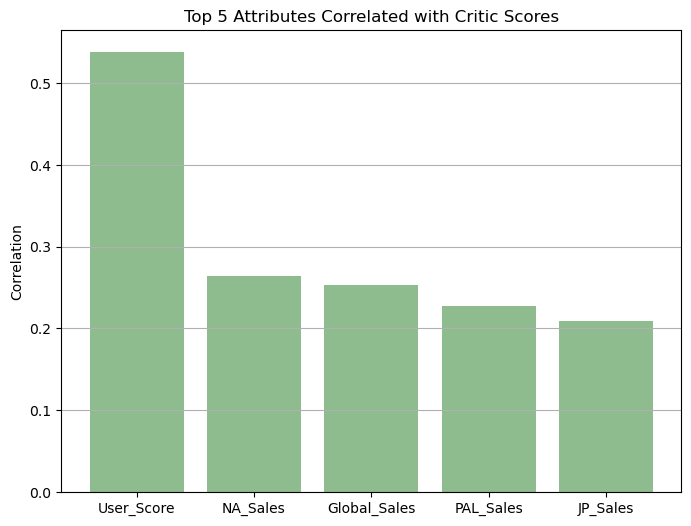

In [24]:
#plot
plt.figure(figsize=(8, 6))
plt.bar(corr_top5.index, corr_top5.values, color = 'darkseagreen')
plt.title('Top 5 Attributes Correlated with Critic Scores')
plt.ylabel('Correlation')
plt.grid(axis = 'y')
plt.savefig('Corr_bar.png', bbox_inches='tight')


This helps visualize how high the correlation between the user score and the critic score is. It also shows that games with high sales are correlated with high critic scores.

Can we predict whether a video game's sales will be above or below average based on user score, critic score, and year?

In [16]:
#calculate average to base above and below on
av_sales = df['Global_Sales'].mean()
df['Average'] = df['Global_Sales'] >= av_sales
df

,Unnamed: 0,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Average
0,0,11,The Sims,Series,2000.0,Electronic Arts,Maxis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,12,Final Fantasy,Series,1987.0,Square,Square,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,13,Grand Theft Auto V,All,2013.0,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,14,Mario Kart,Series,1992.0,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,15,Need for Speed,Series,1994.0,Electronic Arts,EA Black Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56060,61843,62474,Zombieland: Double Tap - Road Trip,PC,2019.0,GameMill Entertainment,High Voltage Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
56061,61844,62475,Zombillie,NS,2018.0,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
56062,61845,62476,Zone of the Enders: The 2nd Runner MARS,PC,2018.0,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
56063,61846,62477,Zoo Tycoon: Ultimate Animal Collection,XOne,2017.0,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [17]:
#features to do decision tree on
features = ['User_Score', 'Critic_Score', 'Year']

X = df[features]
y = df['Average']

#implement label encoder
encode = LabelEncoder()
y = encode.fit_transform(y)

#split the dataset into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

#create a decision tree classifier model
classifier = DecisionTreeClassifier(max_depth=4)

#train the model
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)

visualize decision tree

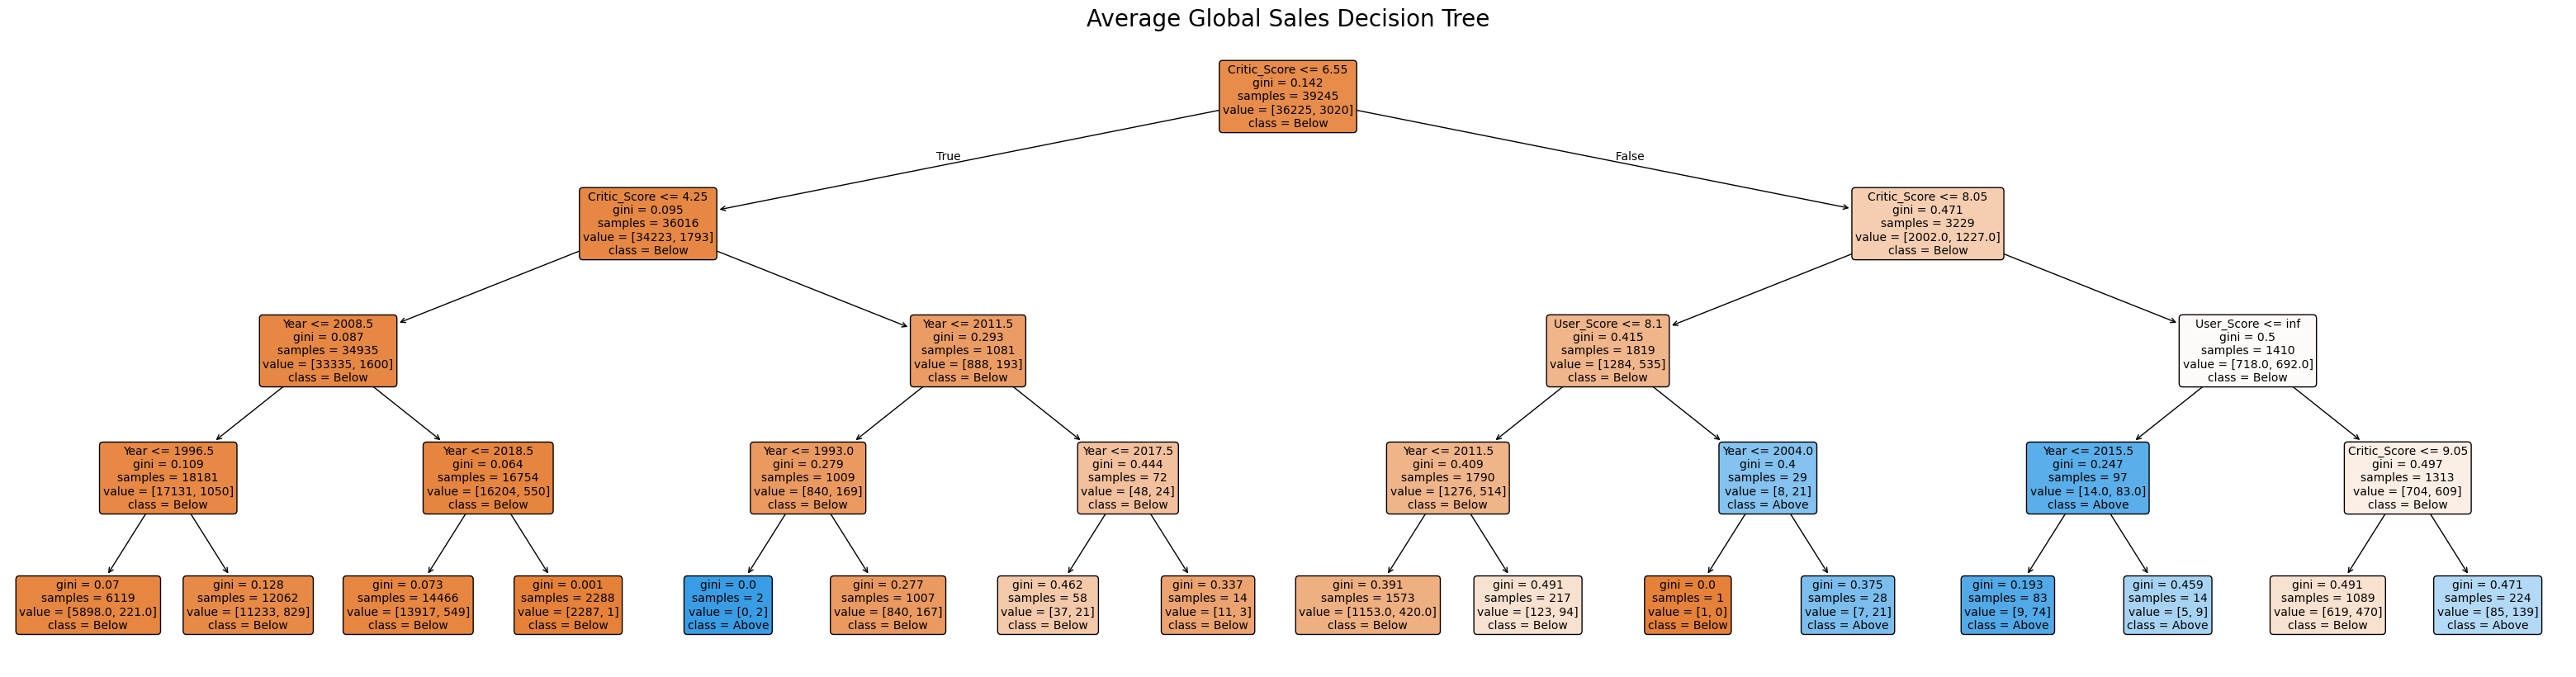

In [18]:
#plot
plt.figure(figsize=(40, 10))
plot_tree(classifier, feature_names=features, class_names=['Below', 'Above'], filled=True, rounded=True, fontsize=10)
plt.title("Average Global Sales Decision Tree", fontsize = 20)
plt.savefig('avg_sales_tree.png', bbox_inches='tight')

#  Max Shuford CS456 Final

### Question: Based on Regional sales, can we determine a meaningful cluster of titles?
> KMeans/KNN visualizations #3

### Can we predict a games ranking based on its Regional sales sales?
> Naive Bayes #2

### Question: What do the trends in game sales each year based on global sales show?
> Temporal Trends #6

# Data Cleaning and Statistics

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, f1_score

In [149]:
df = pd.read_csv('vgsales.csv')

In [150]:
df = df = df.drop(columns= 'Unnamed: 0')

In [151]:
df

,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,11,The Sims,Series,2000.0,Electronic Arts,Maxis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,Final Fantasy,Series,1987.0,Square,Square,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13,Grand Theft Auto V,All,2013.0,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,Mario Kart,Series,1992.0,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,Need for Speed,Series,1994.0,Electronic Arts,EA Black Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56060,62474,Zombieland: Double Tap - Road Trip,PC,2019.0,GameMill Entertainment,High Voltage Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56061,62475,Zombillie,NS,2018.0,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56062,62476,Zone of the Enders: The 2nd Runner MARS,PC,2018.0,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56063,62477,Zoo Tycoon: Ultimate Animal Collection,XOne,2017.0,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# Check our NaN cells
df.isna().sum()

Rank                0
Name                0
Platform            0
Year                0
Publisher           0
Developer           0
Critic_Score    49610
User_Score      55676
NA_Sales        42587
PAL_Sales       42253
JP_Sales        48511
Other_Sales     39939
Global_Sales    36081
dtype: int64

# Based on Regional sales, can we determine a meaningful cluster of titles?

In [153]:
df_clean = df.dropna(subset=['Global_Sales'])
df_clean = df.dropna(subset=['NA_Sales'])
df_clean = df.dropna(subset=['PAL_Sales'])
df_clean = df.dropna(subset=['JP_Sales'])

In [154]:
df_clean['NA_Sales'] = pd.to_numeric(df_clean['NA_Sales'], errors='coerce')
df_clean['Global_Sales'] = pd.to_numeric(df_clean['Global_Sales'], errors='coerce')

C:\Users\MaxSh\AppData\Local\Temp\ipykernel_10512\3148258191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['NA_Sales'] = pd.to_numeric(df_clean['NA_Sales'], errors='coerce')
C:\Users\MaxSh\AppData\Local\Temp\ipykernel_10512\3148258191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Global_Sales'] = pd.to_numeric(df_clean['Global_Sales'], errors='coerce')


In [155]:
numeric = df.select_dtypes(include=['int64', 'float64']).columns

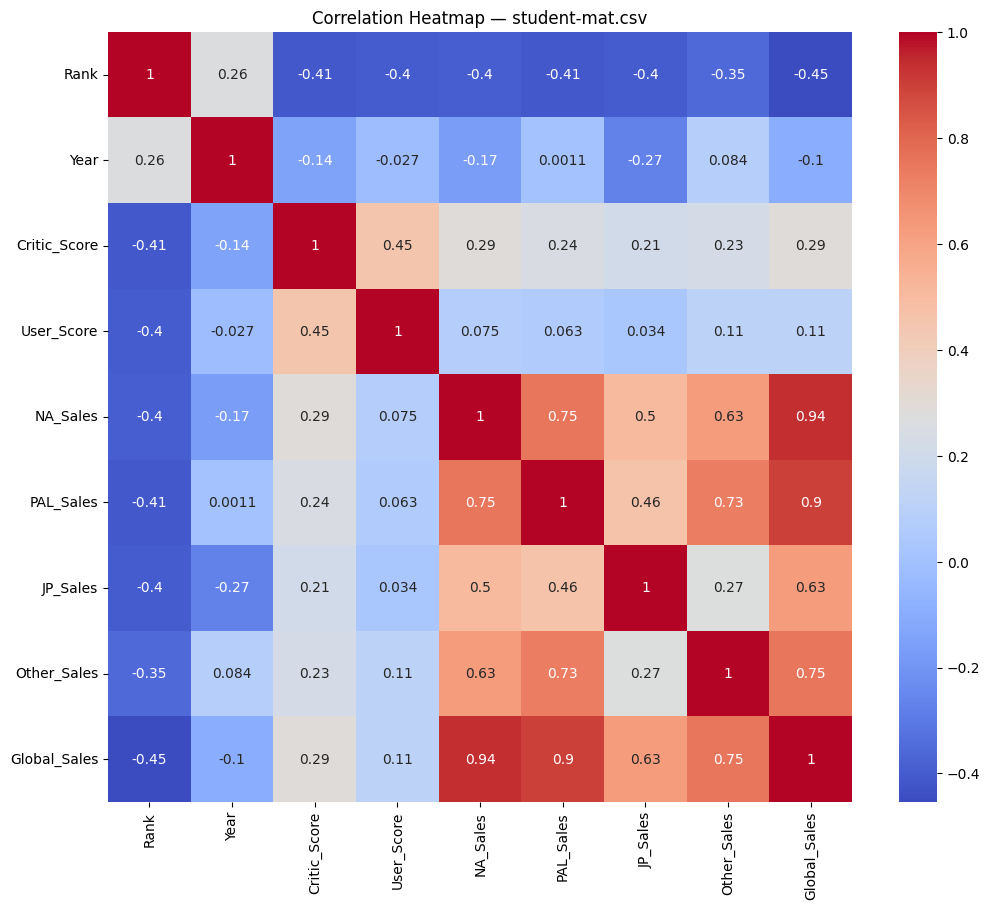

In [182]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean[numeric].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap — student-mat.csv")
plt.savefig('MaxShuford_Corr_VideoGameSales.png')
plt.show()


# Here we can see a correlation matrix that shows the links between all our numeric attributes

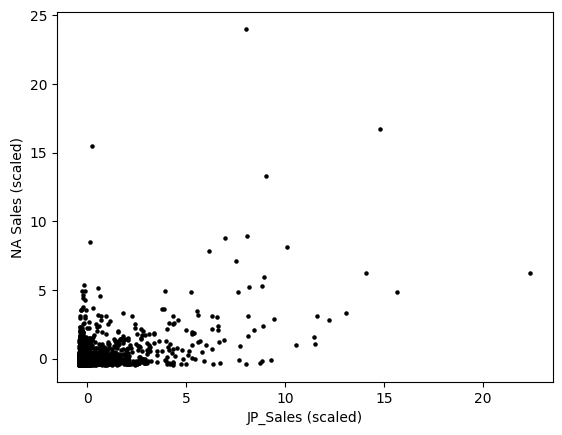

In [157]:
X = df_clean[['JP_Sales', 'NA_Sales']]

scaled = StandardScaler().fit_transform(X)

plt.scatter(scaled[:,0], scaled[:,1], c='black', s=5)
plt.xlabel("JP_Sales (scaled)")
plt.ylabel("NA Sales (scaled)")
plt.show()

### Lets scale logarithmically, that way we can see meaningful clusters 

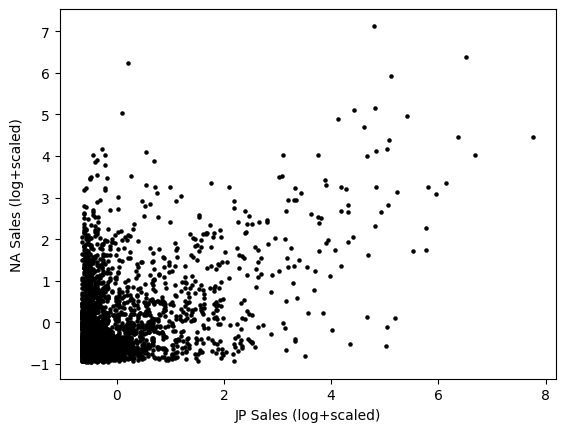

In [158]:
df_log = df_clean.copy()
features = ['JP_Sales', 'NA_Sales', 'PAL_Sales']
df_log = df[features].dropna()
df_log['JP_log'] = np.log1p(df_log['JP_Sales'])
df_log['NA_log'] = np.log1p(df_log['NA_Sales'])

X = df_log[['JP_log', 'NA_log']]
scaled = StandardScaler().fit_transform(X)

plt.scatter(scaled[:,0], scaled[:,1], s=5, c='black')
plt.xlabel("JP Sales (log+scaled)")
plt.ylabel("NA Sales (log+scaled)")
plt.show()

## Lets find our optimal K-value

In [159]:
features = ['JP_Sales', 'NA_Sales', 'PAL_Sales']
df_cluster = df[features].dropna()

for k in range(2, 11):   # silhouette needs at least k=2
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled)
    score = silhouette_score(scaled, labels)
    print(f"k={k}, silhouette score={score}")

k=2, silhouette score=0.6381764394489753
k=3, silhouette score=0.533603093915034
k=4, silhouette score=0.5624711787495446
k=5, silhouette score=0.4815768609573793
k=6, silhouette score=0.4898854048396182
k=7, silhouette score=0.45791728855708413
k=8, silhouette score=0.4530788448462291
k=9, silhouette score=0.4446052247780819
k=10, silhouette score=0.41443659566492813


In [160]:
features = ['JP_Sales', 'NA_Sales', 'PAL_Sales']
df_cluster = df[features].dropna()

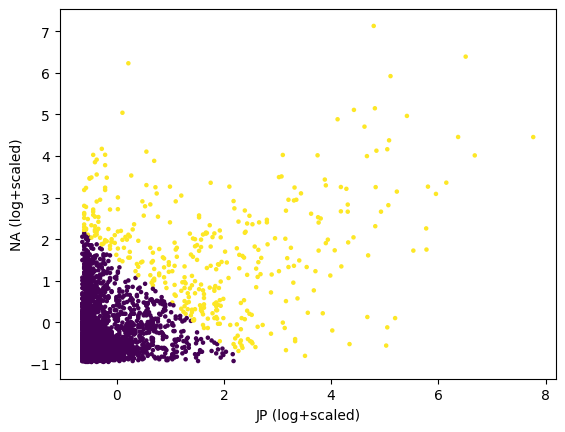

In [162]:
df_cluster['JP_log'] = np.log1p(df_cluster['JP_Sales'])
df_cluster['NA_log'] = np.log1p(df_cluster['NA_Sales'])

X = df_cluster[['JP_log', 'NA_log']]

scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled)

plt.scatter(scaled[:,0], scaled[:,1], c=labels, s=5, cmap='viridis')
plt.xlabel("JP (log+scaled)")
plt.ylabel("NA (log+scaled)")
plt.savefig('JPvsNA_Sales_KMEANS.png')
plt.show()

In [163]:
features = ['PAL_Sales', 'NA_Sales']
df_cluster = df[features].dropna()

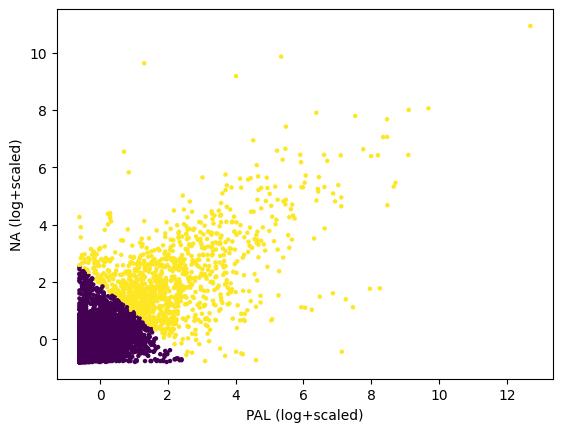

In [164]:
df_cluster['PAL_log'] = np.log1p(df_cluster['PAL_Sales'])
df_cluster['NA_log'] = np.log1p(df_cluster['NA_Sales'])

X = df_cluster[['PAL_log', 'NA_log']]

scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled)

plt.scatter(scaled[:,0], scaled[:,1], c=labels, s=5, cmap='viridis')
plt.xlabel("PAL (log+scaled)")
plt.ylabel("NA (log+scaled)")
plt.savefig('PALvsNA_Sales_KMEANS.png')
plt.show()

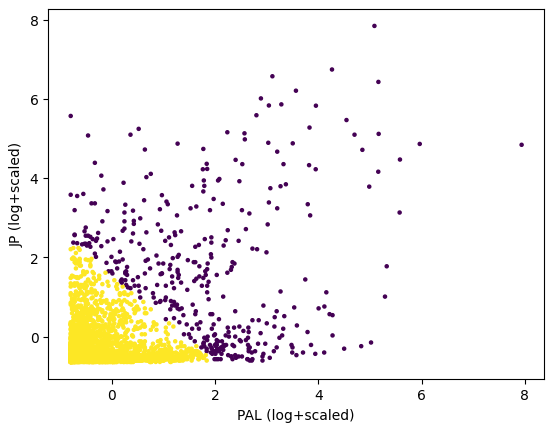

In [181]:
features = ['PAL_Sales', 'JP_Sales']
df_cluster = df[features].dropna()

df_cluster['PAL_log'] = np.log1p(df_cluster['PAL_Sales'])
df_cluster['JP_log'] = np.log1p(df_cluster['JP_Sales'])

X = df_cluster[['PAL_log', 'JP_log']]

scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled)

plt.scatter(scaled[:,0], scaled[:,1], c=labels, s=5, cmap='viridis')
plt.xlabel("PAL (log+scaled)")
plt.ylabel("JP (log+scaled)")
plt.savefig('JPvsPAL_Sales_KMEANS.png')
plt.show()

## 1. Purpose

The purpose of this question was to see if we can see any grouping of sales between Japan, European, and American games sales. The purpose of these groupings was to identify the bulk games vs the outlier games and the trends between regions.

# 2. Methodology

To analyze patterns in video game performance, I began by cleaning the dataset and removing entries with missing values in the sales columns used for clustering. Since raw sales data are heavily skewed and contain extreme outliers, I applied a log transformation followed by standardization to normalize the distribution of each feature. I selected JP_Sales and NA_Sales as the primary attributes for clustering, as these regions exhibit distinct market behaviors and provide useful insight into regional demand patterns. After preprocessing, I used the K-Means algorithm and evaluated different values of k using the silhouette score to determine the optimal number of clusters. The highest silhouette score was achieved at k = 2, indicating that the dataset naturally separates into two well-defined groups. This preprocessing and evaluation pipeline allowed me to create meaningful and interpretable clusters that reflect real differences in regional game sales performance.

# 3. Results

I performed K-Means clustering using two sales regions at a time. The scatterplots of PAL vs. JP Sales, PAL vs. NA Sales, and JP vs. NA Sales all produced a consistent clustering structure, where the algorithm identified two distinct groups of video games. Across all three visualizations, the first cluster represents the large majority of titles that sell at relatively low levels across each region. The second cluster contains a much smaller subset of high-performing titles that achieve significantly stronger sales, forming a clear separation even after log scaling. This pattern suggests that sales behavior is dominated by a small number of blockbuster games that perform well across multiple regions, while the majority of games sell modestly. The consistent separation across different regional pairings reinforces that k = 2 is the most meaningful and stable number of clusters for this dataset. Overall, the clustering results effectively highlight the divide between globally successful titles and the broader market of lower-selling games.

# 4. Highlights

the K-Means algorithm consistently separated the dataset into two dominant groups. The first cluster contains the overwhelming majority of titles, characterized by low to moderate sales in each region, reflecting the typical performance of most games released on the market. In contrast, the second cluster isolates a much smaller subset of high-performing, top-selling games that achieve significantly stronger sales across multiple regions. This divide highlights the highly skewed nature of the video game industry, where only a limited number of blockbuster franchises generate large international sales while most titles remain regionally limited or modest in performance.

# Can we predict a games Global Sales based on its Regional sales

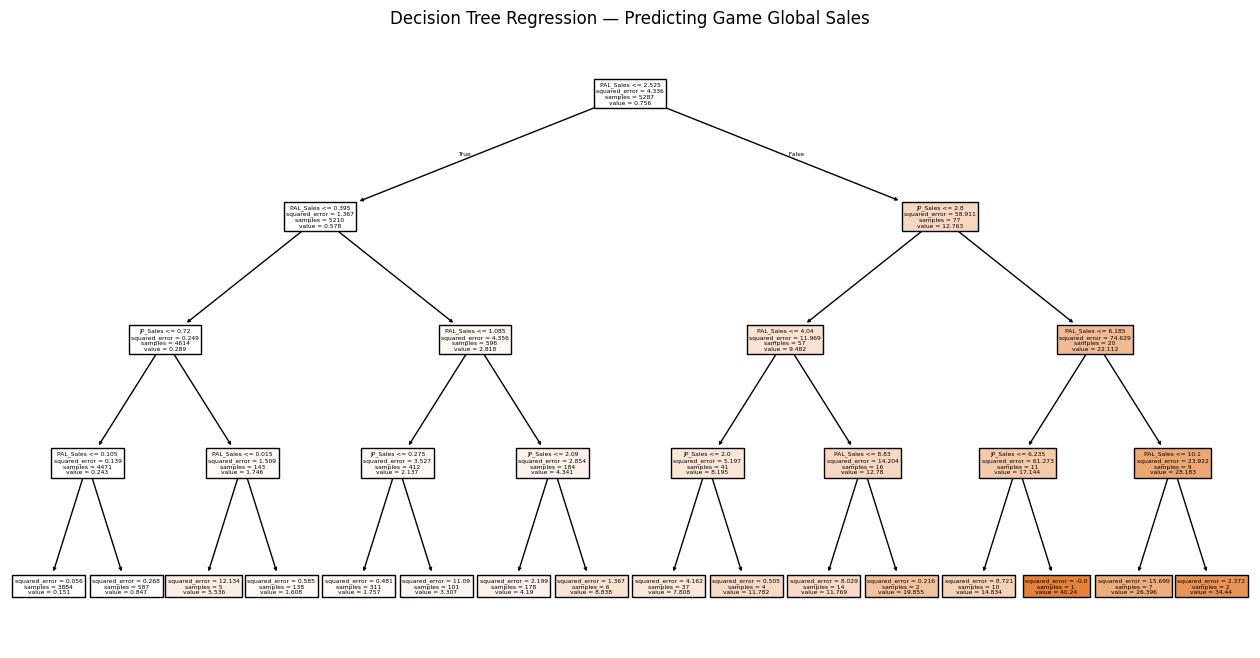

In [166]:
X = df_clean[features]
y = df_clean['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)

plt.figure(figsize=(16,8))
plot_tree(tree, feature_names=features, filled=True)
plt.title("Decision Tree Regression — Predicting Game Global Sales")
plt.savefig('Decision Tree Regression — Predicting Game Global Sales.png')
plt.show()

### Lets classify our data, and fit our sales data into High medium and low tiers

In [173]:
features = ['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']
df_model = df_clean[features + ['Global_Sales']].dropna()
X_log = np.log1p(df_model[features])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

df_model['Sales_Tier'] = pd.qcut(df_model['Global_Sales'],q=3,labels=['Low', 'Medium', 'High'])

y_class = df_model['Sales_Tier']
y_reg = df_model['Global_Sales']

X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(X_scaled, y_class, y_reg, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_class_train)

tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_reg_train)

tier_pred = nb.predict(X_test)
sales_pred = tree.predict(X_test)

In [168]:
results = pd.DataFrame({'Actual_Global_Sales': y_reg_test,'Predicted_Global_Sales': sales_pred,'Actual_Tier': y_class_test,'Predicted_Tier': tier_pred})

In [169]:
results

,Actual_Global_Sales,Predicted_Global_Sales,Actual_Tier,Predicted_Tier
1520,2.41,1.501159,High,High
3157,1.08,0.928824,Medium,Medium
4799,0.64,1.501159,Medium,Medium
4423,0.72,0.360000,Medium,Medium
13626,0.21,0.360000,Low,Low
...,...,...,...,...
6827,0.39,0.360000,Low,Low
1888,1.95,1.501159,High,High
2082,1.86,1.501159,High,Medium
6444,0.43,0.360000,Low,Low


[[252   0  45]
 [  0 270  24]
 [  7  17 269]]


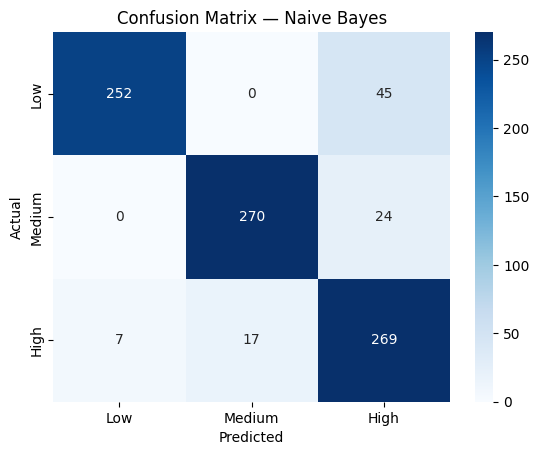

In [172]:
cm = confusion_matrix(y_class_test, tier_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Naive Bayes")
plt.savefig('CM_Naive_Bayes_Global_Sales.png')
plt.show()

In [171]:
print(classification_report(y_class_test, tier_pred))

              precision    recall  f1-score   support

        High       0.97      0.85      0.91       297
         Low       0.94      0.92      0.93       294
      Medium       0.80      0.92      0.85       293

    accuracy                           0.89       884
   macro avg       0.90      0.89      0.90       884
weighted avg       0.90      0.89      0.90       884



# 1. Purpose

The purpose of this analysis is to evaluate whether regional video game sales can be used to predict a game’s overall commercial performance. Specifically, the study investigates two related questions: 
> (1) whether regional sales can accurately estimate a game’s global sales total, and 
>> (2) whether a game can be classified into a sales performance tier—low, medium, or high—based on its sales in North America, Europe, Japan

# 2. Methodology

For regression analysis, a Decision Tree Regressor was trained using regional sales as predictors and global sales as the target variable, with a train–test split of 70/30. This model provides an interpretable structure that highlights which regions contribute most to predicting worldwide sales totals. To support a classification task, the continuous global sales variable was discretized into three equally sized tiers—Low, Medium, and High sellers—using quantile binning. A Gaussian Naive Bayes classifier was then trained to predict these tiers from the same regional sales inputs. Finally, both models were combined into a unified framework in which Naive Bayes provides a categorical sales tier prediction, and the Decision Tree provides a numerical global sales estimate.

# 3. Results

The Decision Tree Regressor trained on log-transformed regional sales achieved meaningful predictive structure, revealing that PAL and JP sales were the strongest determinants of global sales. The regression tree produced interpretable sales partitions, with predicted global sales ranging from under one million units for low-performing titles to over twenty million units for top-selling games.

For the classification task, the Naive Bayes model demonstrated high accuracy in predicting whether a game fell into the Low, Medium, or High global sales tier. The classifier achieved an overall accuracy of 89%, with especially strong precision for the High-selling tier (0.97) and Low-selling tier (0.94). The Medium category showed slightly lower precision (0.80), reflecting a greater overlap in regional sales patterns for mid-range titles. The confusion matrix further confirmed that most misclassifications occurred between Medium and High sellers, while Low sellers were consistently well-identified.

Taken together, the models show that regional sales provide both a reliable numerical estimate of global performance and a strong categorical signal that supports effective classification.

# 4. Harvest Highlights

Titles with strong PAL and JP sales were consistently associated with high global totals, as reflected in the structure of the Decision Tree Regressor. Second, the Naive Bayes classifier revealed that global sales naturally fall into three distinct tiers, and that these tiers are highly predictable from regional performance alone. The consistency of the results across both the regression and classification tasks highlights a clear pattern, regional markets are not isolated but instead act as strong predictors of worldwide performance. The analysis reinforces the idea that commercial success in one region often correlates with broader international appeal.

# What do the trends in game sales each year based on global sales show?

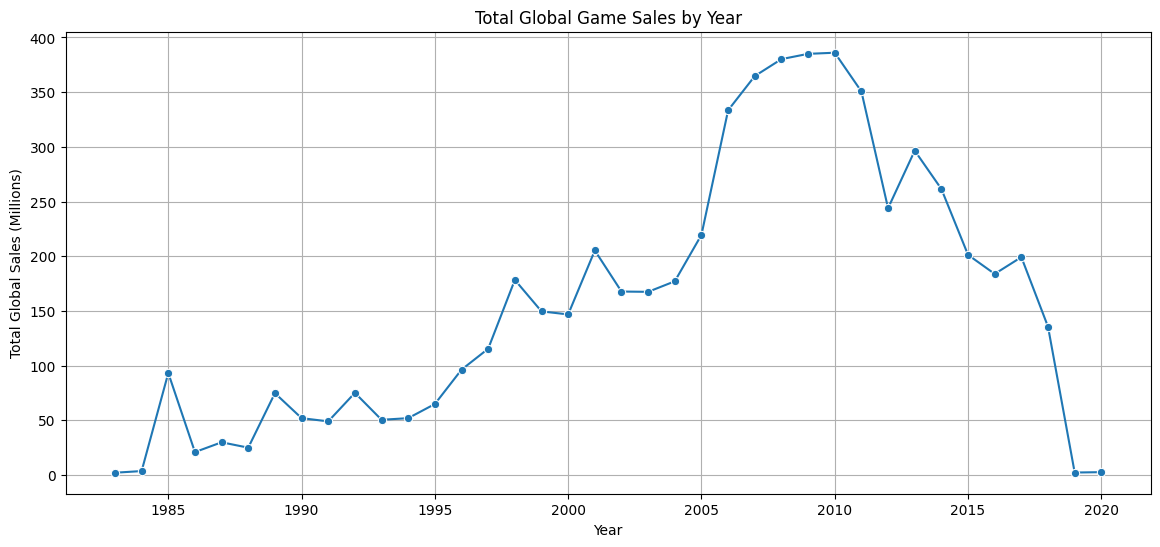

In [178]:
df_year = df_clean[['Year', 'Global_Sales']].dropna()

# Convert Year to int
df_year['Year'] = df_year['Year'].astype(int)

# Aggregate metrics
sales_by_year = df_year.groupby('Year')['Global_Sales'].sum()
avg_sales_by_year = df_year.groupby('Year')['Global_Sales'].mean()
games_per_year = df_year.groupby('Year').size()

# Graph!

plt.figure(figsize=(14,6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, marker='o')
plt.title("Total Global Game Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Global Sales (Millions)")
plt.grid(True)
plt.savefig('TotalGameSales.png')
plt.show()

### Average game sales per game per year

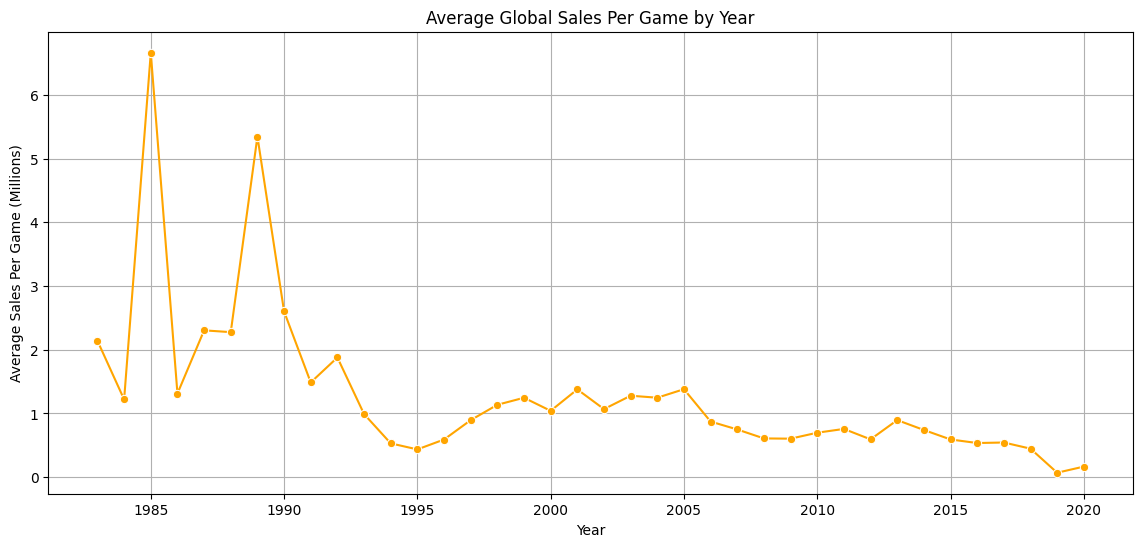

In [179]:

plt.figure(figsize=(14,6))
sns.lineplot(x=avg_sales_by_year.index, y=avg_sales_by_year.values, marker='o', color='orange')
plt.title("Average Global Sales Per Game by Year")
plt.xlabel("Year")
plt.ylabel("Average Sales Per Game (Millions)")
plt.grid(True)
plt.savefig('AverageGameSalesPerYear')
plt.show()

### Number of Games released by year

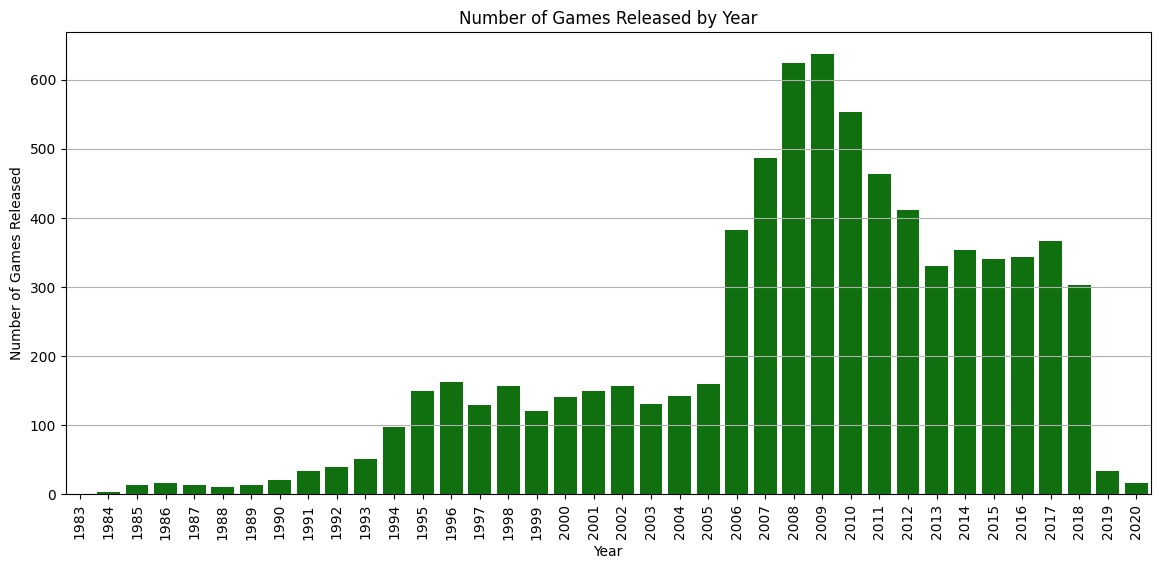

In [180]:
plt.figure(figsize=(14,6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, color='green')
plt.title("Number of Games Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.savefig('NumberOfGamesReleased')
plt.show()

# 1. Purpose

The purpose of this analysis is to examine how global video game sales have changed over time and to identify meaningful trends in yearly performance. By aggregating total global sales, average sales per game, and the number of games released each year, the goal is to determine how the video game market has evolved and to understand major shifts in consumer demand, industry growth, and market saturation.

# 2. Methodology

The dataset was filtered to include only entries with valid year and global sales values. The analysis begins by grouping the data by release year and computing three key metrics: 

(1) total global sales per year 

(2) average global sales per game

(3) the number of games released each year

These metrics were visualized using line plots and bar charts to identify macro-level trends across multiple decades of video game history. Line plots were used to represent total and average sales trends, while a bar chart was used to show yearly game release counts.

# 3. Results

Total global sales show a strong upward trajectory from the early 2000s through approximately 2008–2009, marking a period of rapid industry growth driven by major console platforms and high-volume franchises. After peaking around 2008, total sales begin a steady decline. This trend could be seen because of a slow move towards digital sales over physical sales or even mobile gaming.

Average global sales per game follow a similar pattern, peaking in the late 2000s before dropping off in later years. This decline is partially explained by the increasing number of games released per year, which surged during the mid-to-late 2000s and resulted in greater market saturation.

In the 2010s, both total and average sales stabilize, with occasional spikes corresponding to hits. These spikes indicate that the market became increasingly dependent on a smaller number of high-performing titles, while the majority of games sold at more modest levels.

# 4. Harvest Highlights

The analysis of yearly global sales shows several important patterns. Global video game sales increased steadily in the early and mid-2000s and reached their highest point around 2008 and 2009. After that peak, sales began to decline as the industry shifted away from physical game sales and toward digital downloads and online platforms.

The number of games released each year also grew during the mid-2000s, which helped explain why the average sales per game started to drop. As more games entered the market, individual titles sold fewer copies on average. In the later years, global sales became more stable, but large spikes still appeared when major blockbuster games were released.

Overall, the results show that the video game industry moved from a period of rapid growth to a more crowded and competitive market, and eventually toward a system that depends heavily on a few extremely successful titles. This helps explain how both industry trends and consumer behavior have changed over time.